In [1]:
using Pkg;
Pkg.activate("../../.");
using SchrodingerEquationSolver
using Plots
using Roots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver_examples`


In [2]:
# Space grid definition and creation
r_min::Float64=-7.0; #Where the space grid starts.
r_max::Float64=7.0; #Where the space grid ends.
N=2000; #Number of points in the space grind.
grid_stru= Grids.init_uniform_grid_structure(r_min, r_max, N); #Grid creation, grid is the list with the grid points.

In [3]:
V0=10.0;
a=3.0;
f(E) = (2.0*E)^(1/2)*tan(a*(2.0*E)^(1/2)) - (2.0*(V0-E))^(1/2);
der_f(E)= tan(a*(2.0*E)^(1/2))*(2.0*E)^(-1/2) + a*sec(a*(2.0*E)^(1/2))^(2) + (2.0*(V0 - E))^(-1/2);
# Use Newton-Raphson method
root = find_zero((f, der_f), 1.0, Roots.Newton())

println("Root = ", root)

Root = 1.0657218567434281


In [4]:
v_effe= V0*((grid_stru.grid .< -1.0*a) .| (grid_stru.grid .> a));

In [5]:

ei= root;
#define initial conditions for 
u1=exp(ei*grid_stru.grid[1]);
du1=ei*exp(ei*grid_stru.grid[1]);
u_end=exp(-ei*grid_stru.grid[end]);
du_end=-1.0*ei*exp(ei*grid_stru.grid[1]);

In [6]:
u_merged, merge_value, merge_ratio= OneDSchrodingerEquationSolver.solver_uniform_grid(ei, u1, du1, u_end, du_end, 1,v_effe, grid_stru);

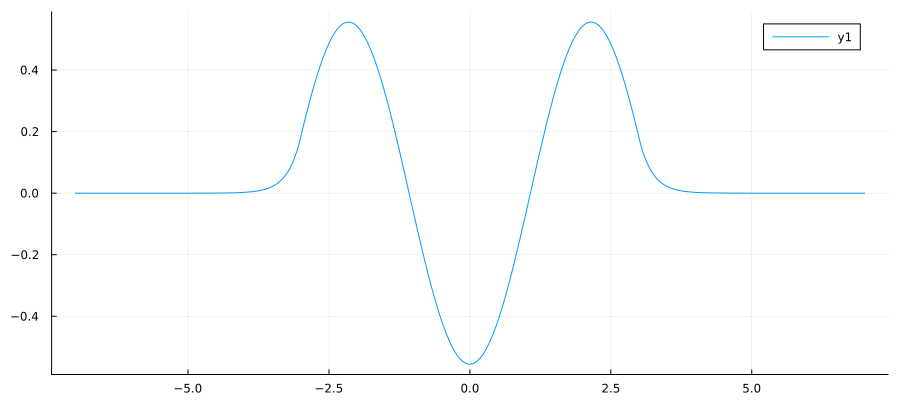

In [7]:
plot!(grid_stru.grid, u_merged)
plot!(size=(900,400))

In [9]:
E_max::Float64=V0; #Maximal energy in the energy grid.
E_min::Float64=0.0; #Minimal energy in the energy grid.
E_N::Int64=400; #Number of points in the energy grid.
E_grid= Grids.uniform_grid(E_min, E_max, E_N); #List with the energy grid points.

In [10]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid_stru,
    InitialConditions.harmoic_oscillator_1D,
    OneDSchrodingerEquationSolver.solver_uniform_grid);

In [11]:
E_intervals

8-element Vector{Tuple{Float64, Float64}}:
 (0.12531328320802004, 0.15037593984962405)
 (1.0526315789473684, 1.0776942355889725)
 (1.8796992481203008, 1.9047619047619047)
 (2.932330827067669, 2.9573934837092732)
 (4.2105263157894735, 4.235588972431078)
 (5.7142857142857135, 5.739348370927318)
 (7.393483709273182, 7.4185463659147866)
 (9.172932330827066, 9.197994987468672)

In [12]:
numb_solu::Int64= size(E_intervals)[1]; #Number of potential solutions in the energy grid.
eigen_list::Vector{Float64}=zeros(numb_solu); #Initializing the list that is going to hold the energy eigenvalues.
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu]; #Initializing the list that holds the eigenfunctions list.

In [13]:
#Using Illinois algorithm to find the actual energy eigenvalue and eigenfunction for everyone of the energy intervals.
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, 
    grid_stru,InitialConditions.harmoic_oscillator_1D, 
    OneDSchrodingerEquationSolver.solver_uniform_grid);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [14]:
#Printing the energies
eigen_list

8-element Vector{Float64}:
 0.12744585430285807
 1.0677555271887191
 1.894056053294969
 2.95025050632922
 4.229871823900537
 5.721493714227265
 7.401507585827769
 9.197623568665488

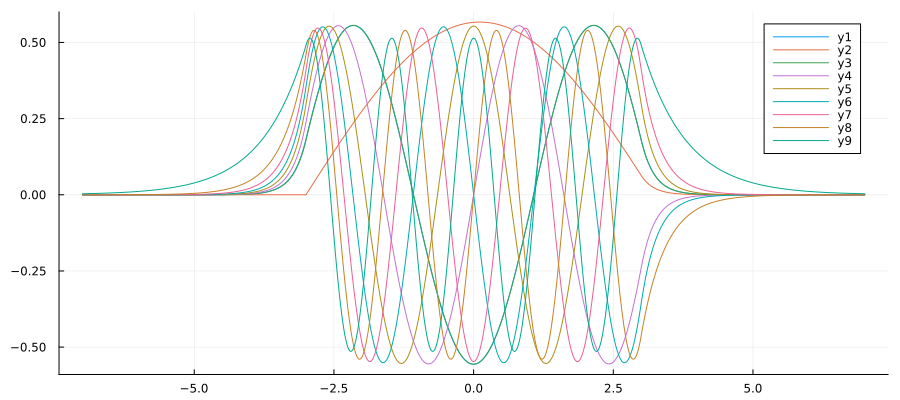

In [15]:
#Plot of the wave functions
plot!(grid_stru.grid, u_wave_functions)
plot!(size=(900,400))